# [Tutorial](https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/01-accessing-data.ipynb)

---
## Loading various sources

Now let's begin exploring data with CliMetLab. We will start by loading various "sources". A source is "something providing data". It needs some parameters to define the actual location of the data. For instance, a source can be a URL, a remote or local server, a database, or a file, etc.

Below are a few examples of using cml.load_source().

Notice how:

    The API to retrieve the data is similar.
    Credentials are requested if needed with appropriate help message, then saved locally.
    Data is provided as pandas.Dataframe or xarray.Dataset.

Let's download some files for the examples:


In [1]:
!test -f test.grib || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib
!test -f test.nc || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc
!test -f temp.bufr || wget http://download.ecmwf.int/test-data/metview/gallery/temp.bufr

--2023-04-25 15:32:23--  https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.grib [following]
--2023-04-25 15:32:24--  https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.grib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1052 (1.0K) [application/octet-stream]
Saving to: ‘test.grib’

test.grib           100%[=====================>]   1.03K  --.-KB/s   in 0s     

2023-04-25 15:32:25 (7.60 MB/s) - ‘test.grib’ saved [1052/1052]

--2023-04-25 15:32:25--  https://github.com

---
## Import CliMetLab

In [2]:
import climetlab as cml

---
## Read data from a file `cml.load_source("file", file_name)`

### The purpose of the "file" source is to open `any` file, CliMetLab guesses what type of file is provided.

- ### How to read data from a GRIB file:

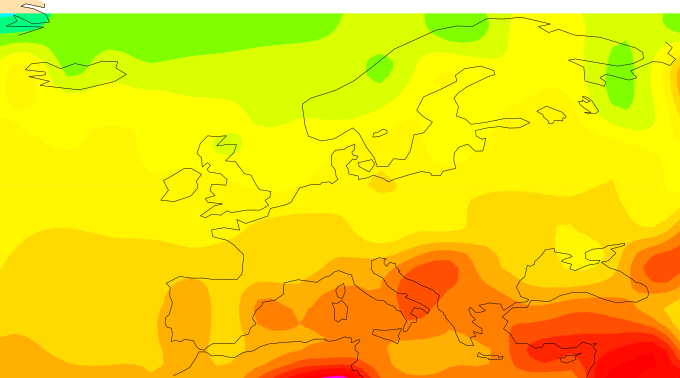

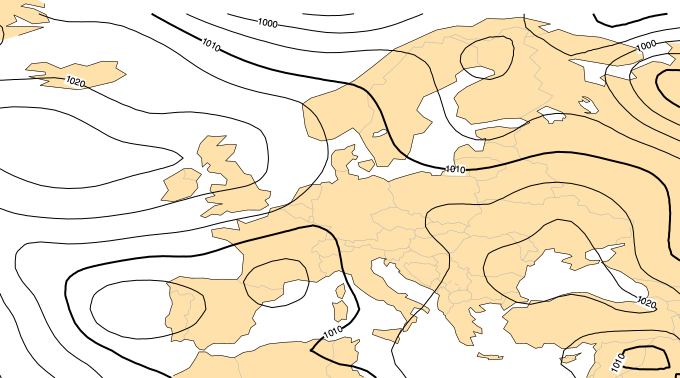

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-04-25T15:34 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
ds = cml.load_source('file', 'test.grib')
for field in ds:
    cml.plot_map(field)
ds.to_xarray()

- ### How to read data from a netCDF file:

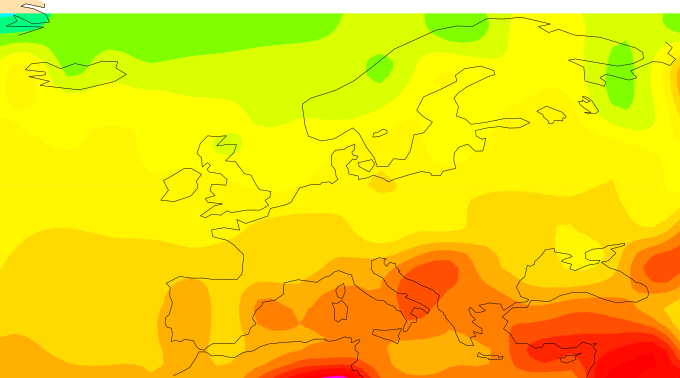

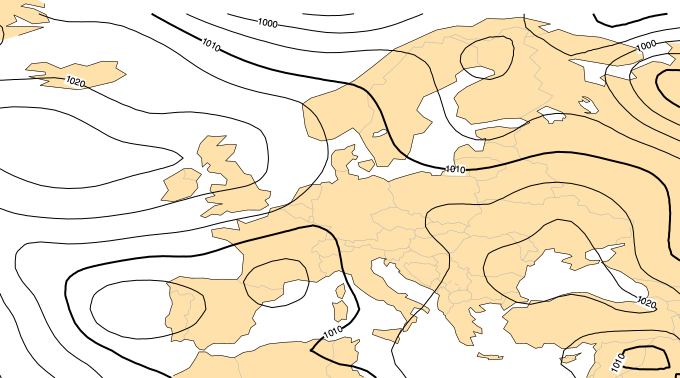

<xarray.Dataset>
Dimensions:     (longitude: 19, latitude: 11)
Coordinates:
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
    number      int32 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     int32 ...
    valid_time  datetime64[ns] ...
Data variables:
    t2m         (latitude, longitude) float32 dask.array<chunksize=(11, 19), meta=np.ndarray>
    msl         (latitude, longitude) float32 dask.array<chunksize=(11, 19), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 GRIB to CDM+CF via cfgrib-0.9.5/ecCodes-2.17.0 w...

In [4]:
ds = cml.load_source('file', 'test.nc')
for field in ds:
    cml.plot_map(field)
ds.to_xarray()

- ### How to read data from a BUFR file:

### [BUFR: Binary Universal Form for the Representation of meteorological data ](https://www.dwd.de/EN/aboutus/it/functions/Teasergroup/bufr.html)

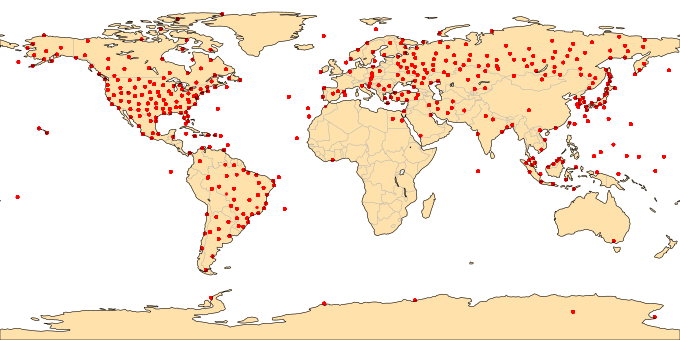

,stationNumber,latitude,longitude,pressure,airTemperature,data_datetime
0,907,58.47,-78.08,100300.0,258.3,2008-12-08 12:00:00
1,907,58.47,-78.08,100000.0,259.7,2008-12-08 12:00:00
2,907,58.47,-78.08,99800.0,261.1,2008-12-08 12:00:00
3,907,58.47,-78.08,99100.0,261.7,2008-12-08 12:00:00
4,907,58.47,-78.08,92500.0,258.1,2008-12-08 12:00:00
...,...,...,...,...,...,...
26000,968,25.03,121.52,10000.0,197.9,2008-12-08 12:00:00
26001,968,25.03,121.52,9520.0,196.3,2008-12-08 12:00:00
26002,968,25.03,121.52,7000.0,201.5,2008-12-08 12:00:00
26003,968,25.03,121.52,5000.0,209.1,2008-12-08 12:00:00


In [5]:
ds = cml.load_source('file', 'temp.bufr')

df = ds.to_pandas(
    columns=(
        "stationNumber",
        "latitude",
        "longitude",
        "data_datetime",
        "pressure",
        "airTemperature",
    ),
    filters={},
)
cml.plot_map(df, projection='global')
df

---
## Reading from a URL `cml.load_source("url", URL)`

- ### How to read data from a GRIB URL (using the climetlab source 'url')

test.grib:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

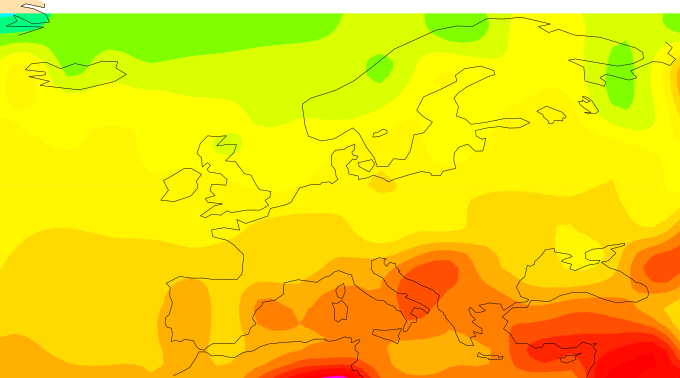

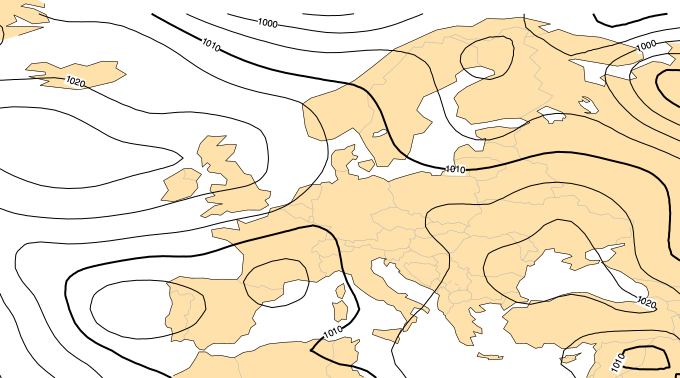

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-04-25T15:45 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ds = cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib')
for field in ds:
    cml.plot_map(field)
ds.to_xarray()

In [8]:
cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc')
cml.load_source('url', 'http://download.ecmwf.int/test-data/metview/gallery/temp.bufr')

Home page,-
Documentation,-
Citation,-
Licence,-


- ### Downloading 32M of data

In [9]:
URL = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv"
data = cml.load_source("url", URL)
pd = data.to_pandas()

ibtracs.SP.list.v04r00.csv:   0%|          | 0.00/33.2M [00:00<?, ?B/s]

/Users/wenwen/miniforge3/envs/env_tf/lib/python3.9/site-packages/climetlab/readers/csv.py:146: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  return pandas.read_csv(self.path, **pandas_read_csv_kwargs)


- ### Cyclone track

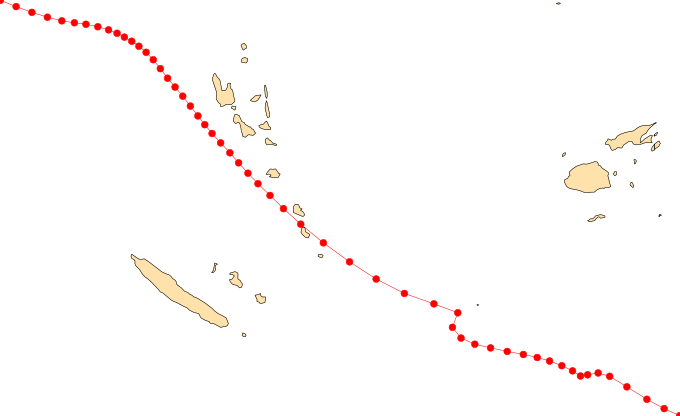

In [10]:
uma = pd[pd.NAME == "UMA:VELI"]
cml.plot_map(uma, style="cyclone-track")

- ### As shown below, data can be read from different sources, the API is similar: `load_source` with keywords to specify the data requested. 

<multiple>:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

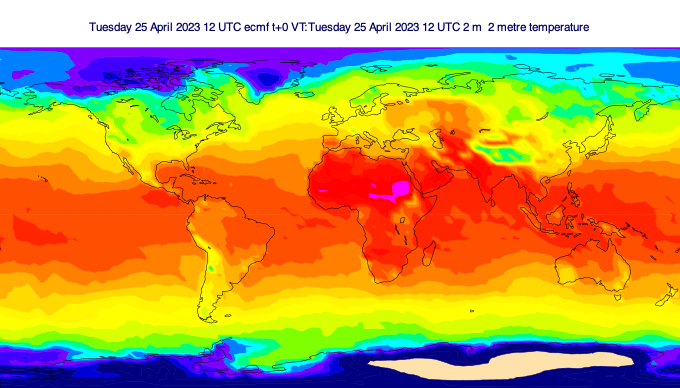

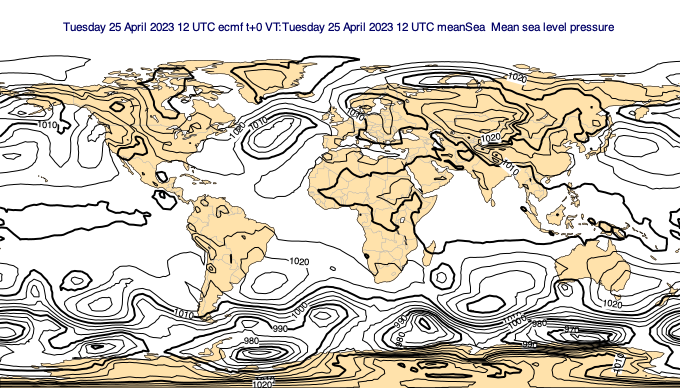

<bound method XarrayMixIn.to_xarray of GRIBReader(/var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/climetlab-wenwen/e-odretriever-64d4a36b9b8cbeaa3bdb6d505daee72d6a5cb4b91af329aa403ecce538de27e9.cache)>

In [12]:
source = cml.load_source(
    "ecmwf-open-data",
    param=['2t', 'msl'],
)

for s in source:
    cml.plot_map(s, title=True)
source.to_xarray

- ### Use Climate Data Store (CDS) API key to retrieve data. 

### <span style='color:blue'>Note: Data download requests can be sent programatically via our API. However, a user ID and API key must be sent using HTTP basic authentication. In the API key prompts, use `UID:API_KEY`.</span>

API url: 


API key: ········


2023-04-25 16:08:09,262 INFO Welcome to the CDS
2023-04-25 16:08:09,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-04-25 16:08:09,970 INFO Request is completed
2023-04-25 16:08:09,975 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/adaptor.mars.internal-1680789498.9894876-9434-10-309f5aaa-9b09-4461-8869-94644e7c30b9.grib to /var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/climetlab-wenwen/cds-retriever-a057f8b7f2ade3e68be46ddf132c68145e561e13afc27b9cbb67b7f4d09dd5ea.cache.tmp (189.8K)
2023-04-25 16:08:12,743 INFO Download rate 68.6K/s                                                                                                                                                   


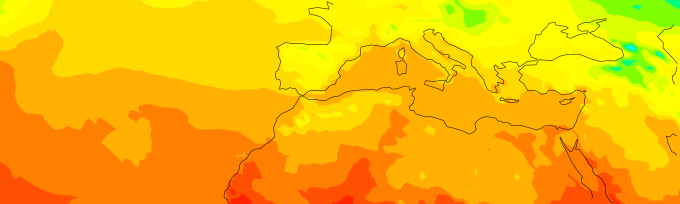

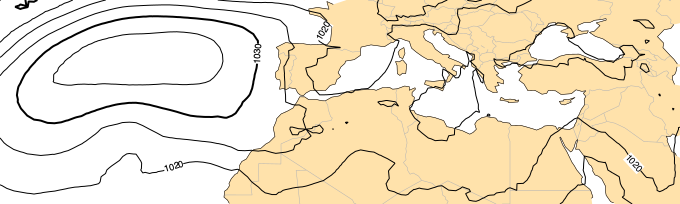

In [15]:
source = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=['2t', 'msl'],
    product_type='reanalysis',
    area=[50, -50, 20, 50],
    date='2011-12-02', # ["2011-12-02", "2011-12-03"] for several dates
    time='12:00',
)
for s in source:
    cml.plot_map(s)

- ### Use ECMWF API 

### Note: see [here](https://github.com/ecmwf/ecmwf-api-client) for more details.

In [20]:
# source = cml.load_source(
#     "mars",
#     param=["2t", "msl"],
#     levtype="sfc",
#     area=[50, -50, 20, 50],
#     grid=[1, 1],
#     date="2011-12-02",
    
# )
# for s in source:
#     cml.plot_map(s)
# source.to_xarray()

In [21]:
# source = cml.load_source(
#     "mars",
#     type="ofb",
#     obsgroup="conv",
#     time="12",
#     format="odb",
#     reportype=16001,
#     date="2020-05-18",
# )
# pd = source.to_pandas()

---
## Dataset


- ### Example dataset: hurricane database

In [19]:
atlantic = cml.load_dataset('hurricane-database', bassin='atlantic')
df = atlantic.to_pandas()

hurdat2.txt: 0.00B [00:00, ?B/s]

- ### Example dataset: part of ERA5

In [22]:
ds = cml.load_dataset("era5-temperature", 
#    period=(1979, 1999), # This can be long to run.
    period=(1979, 1981),
    domain="France",
    time=12,
 )

2023-04-25 16:25:01,205 INFO Welcome to the CDS
2023-04-25 16:25:01,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-04-25 16:25:01,727 INFO Request is completed
2023-04-25 16:25:01,733 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1682325624.0770228-4281-4-092ca27d-82e1-40cb-b49e-6b94f7d3b718.grib to /var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/climetlab-wenwen/cds-retriever-a0e666107560537dfa3521e4f93592c1559a70df128bb361f05583099b387e95.cache.tmp (2.8M)
2023-04-25 16:25:04,964 INFO Download rate 900.5K/s                                                                                                                                                  
2023-04-25 16:25:05,450 INFO Welcome to the CDS
2023-04-25 16:25:05,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-04-25 16:25:05,8

In [23]:
ds.to_xarray()

<xarray.Dataset>
Dimensions:     (number: 1, time: 1096, step: 1, surface: 1, latitude: 63,
                 longitude: 63)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 1979-01-01T12:00:00 ... 1981-12-31T12:0...
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 54.5 54.25 54.0 53.75 ... 39.5 39.25 39.0
  * longitude   (longitude) float64 -6.0 -5.75 -5.5 -5.25 ... 8.75 9.0 9.25 9.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-04-25T16:25 GRIB to CDM+CF via cfgrib-0.9.1...

### Once the data has been downloaded, it is cached locally. The following will not download any additional data.

In [24]:
ds = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="France",
    time=12,
)

### If the dataset is not found, CliMetLab provides the list of available datasets:

#### Example: asking for an unknown dataset with a typo

In [25]:
cml.load_dataset('hurican-database-with-typo') # Asking for an unknown dataset with a typo

hurican-database-with-typo.yaml: 0.00B [00:00, ?B/s]

Cannot find dataset 'hurican-database-with-typo', did you mean 'hurricane-database'?


NameError: Cannot find dataset 'hurican-database-with-typo' (values are: era5-precipitations, era5-single-levels, era5-temperature, example-dataset, high-low, hurricane-database, meteonet-radar-rainfall, meteonet-samples-ground-stations, meteonet-samples-masks, meteonet-samples-radar, meteonet-samples-weather-models, sample-bufr-data, sample-grib-data, weather-bench)

### Additional datasets are defined with python plugins (via pip install), more details on this process in the "Dataset plugins" notebook.

### More examples can be found at (https://climetlab.readthedocs.io/en/latest/examples.html).


---
## Exercises

- ### Find the mean temperature (2m temperature) in Italy in 1980, at 6am.

In [26]:
data = cml.load_dataset(
    "era5-temperature",
    period=1980,
    domain='Italy',
    time=6,
)
ds = data.to_xarray()
float(ds.mean().t2m)

2023-04-25 16:28:35,876 INFO Welcome to the CDS
2023-04-25 16:28:35,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-04-25 16:28:36,262 INFO Request is completed
2023-04-25 16:28:36,266 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/adaptor.mars.internal-1681758535.718092-7896-5-82abd3b8-070c-4ca2-82ff-574ba3a3d78b.grib to /var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/climetlab-wenwen/cds-retriever-aa6308824a9555852822234e1accd9c9e28a360d7682a543c22c8dafa837e8e6.cache.tmp (2.8M)
2023-04-25 16:28:38,756 INFO Download rate 1.1M/s                                                                                                                                                    


284.1121520996094